In [1]:
# Data Processing Tools
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping
from collections import Counter

# Scikit Learn Machine Learning Tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm

# Data Set
from mnist import MNIST

%matplotlib inline

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

### Part 1: Reading in MNIST Data

In [5]:
mndata = MNIST('/Users/johnyang/Documents/Apps/MLAI/Notebooks')
mnist_images, mnist_labels = mndata.load_testing()

# Create DataFrame with 784 (28x28 Image) columns and 10000 rows
# Column = feature / color of pixel at specific index
# Row = One instance of data 
mnist_df = pd.DataFrame(mnist_images)

# Add labels corresponding to images as last column in table
mnist_df.insert(loc=0, column='label', value=mnist_labels)

# Separate image pixel values and labels
# Take first 5000 images b/c ain't nobody got time for 10000 images
images = mnist_df.iloc[0:5000, 1:]
labels = mnist_df.iloc[0:5000, :1]

# Randomly separate data into testing and training batches
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size=0.5, random_state=0)

# Cast pandas array types into numpy arrays to make it easier to run computations
train_images_array = train_images.as_matrix()
test_images_array = test_images.as_matrix()
train_labels_array = train_labels.as_matrix()

### Part 2: Visualization of MNIST Data

Text(0.5,1,'5')

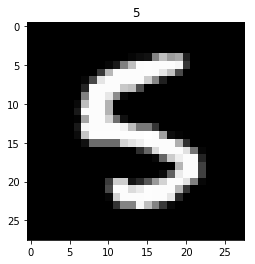

In [6]:
# Select first image from training set
image = train_images.iloc[0].as_matrix()

# Reshape 784x1 row into 28x28 matrix / image
image = image.reshape((28, 28))

# Visual Representation of one instance of the data
plt.imshow(image, cmap='gray')
plt.title(train_labels.iloc[0, 0])

(array([ 628.,    9.,   11.,    4.,    9.,    9.,    6.,   14.,   14.,   80.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

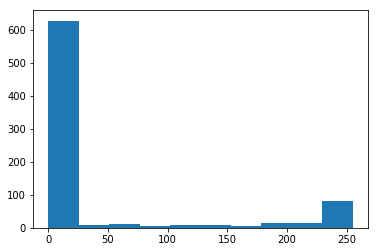

In [7]:
# Histogram Plot representing Distribution of Data
plt.hist(train_images.iloc[0])

### Part 3: K Nearest Neighbors

In [8]:
test_images_len = test_images.shape[0]
predictions = []

batch_size = 250
batches = int(test_images_len/batch_size)

print("Number of batches: " + str(batches))
for i in range(int(batches)):
    # Time of batch processing speed
    tick = time.time()
    
    # Euclidean Distance Calculation
    test_prediction = test_images_array[(i * batch_size):((i+1) * batch_size)]
    dot_product = np.dot(test_prediction, train_images_array.T)
    
    sum_square_test = np.square(test_prediction).sum(axis=1)
    sum_square_train = np.square(train_images_array).sum(axis=1)
    
    distances = np.sqrt(-2 * dot_product + sum_square_train + np.matrix(sum_square_test).T)
    
    num_distances = distances.shape[0]
    
    # Batch Predictions
    label_predictions = np.zeros(num_distances)
    for j in range(num_distances):
        k_closest_y = []
        
        # Labels from points with distance calculated
        calculated_labels = train_labels_array[np.argsort(distances[j,:])].flatten()
        
        # 3 Closest Neighbors
        k_closest_y = calculated_labels[:3]
        
        # Count Unique Neighbors
        counted = Counter(k_closest_y)
        
        label_predictions[j] = counted.most_common(1)[0][0]
    
    predictions = predictions + list(label_predictions)
    
    tock = time.time()
    
    print("Completed batch " + str(i + 1) + "/" + str(batches) + " in " + str(tock - tick) + " Seconds.")

Number of batches: 10
Completed batch 1/10 in 2.826181173324585 Seconds.
Completed batch 2/10 in 2.7535407543182373 Seconds.
Completed batch 3/10 in 2.764810085296631 Seconds.
Completed batch 4/10 in 3.0500662326812744 Seconds.
Completed batch 5/10 in 3.379239320755005 Seconds.
Completed batch 6/10 in 3.2485549449920654 Seconds.
Completed batch 7/10 in 3.1414830684661865 Seconds.
Completed batch 8/10 in 3.2380712032318115 Seconds.
Completed batch 9/10 in 3.150099992752075 Seconds.
Completed batch 10/10 in 3.269331932067871 Seconds.


In [9]:
prediction_array = np.asarray(predictions)

correct = 0
count = 0
for index, row in test_labels.iterrows():
    actual_label= int(row['label'])
    if (actual_label == prediction_array[count]):
        correct += 1
    count += 1

print(float(correct) / float(count))

0.9116


### Part 4: Support Vector Machine

In [10]:
# Trial 1: Apply SVM to raw data set
svm_classifier = svm.SVC()
svm_classifier.fit(train_images, train_labels.values.ravel())
accuracy = svm_classifier.score(test_images, test_labels)
print(str(round(accuracy, 4)))

0.1008


Text(0.5,1,'label    5\nName: 778, dtype: int64')

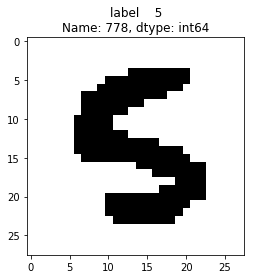

In [11]:
# Denoising number boundaries to be more clear
test_images[test_images > 0] = 1
train_images[train_images > 0] = 1

# Revisualize MNIST Data Images
binary_image = train_images.iloc[0].as_matrix().reshape((28, 28))
plt.imshow(binary_image, cmap='binary')
plt.title(train_labels.iloc[0])

(array([ 605.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  179.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

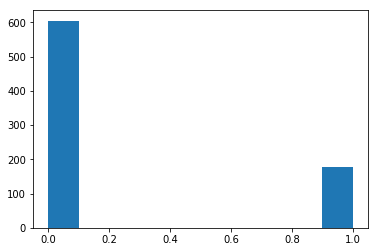

In [12]:
# Histogram indicates that data is either 1 or 0
plt.hist(train_images.iloc[0])

In [13]:
# Trial 2: Apply SVM to binary data set
svm_classifier = svm.SVC()
svm_classifier.fit(train_images, train_labels.values.ravel())
accuracy = svm_classifier.score(test_images, test_labels)
print("Accuracy: " + str(round(accuracy, 4)))
print(classification_report(train_labels, predictions))

Accuracy: 0.8948
             precision    recall  f1-score   support

          0       0.13      0.13      0.13       227
          1       0.08      0.09      0.09       276
          2       0.13      0.11      0.12       278
          3       0.13      0.13      0.13       247
          4       0.09      0.08      0.09       250
          5       0.08      0.08      0.08       233
          6       0.11      0.12      0.11       225
          7       0.11      0.10      0.10       267
          8       0.08      0.07      0.07       238
          9       0.08      0.08      0.08       259

avg / total       0.10      0.10      0.10      2500



### Part 5: Logistic Regression with Tensorflow

In [18]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### Part 5, Section 1: Softmax Regression Implementation

In [19]:
# Placeholder: Value to be input when asking TensorFlow to run computation
# 784 = Flattened 28x28 Image
# Parameter 1: Tensor values' type, Parameter 2: Shape
x = tf.placeholder(tf.float32, [None, 784])

# Variable: Modifiable tensor living in the TensorFlow graph
# W's Shape (784, 10) means 784 Image -> 10 Dim. Evidence Vector
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Softmax Regression!
y = tf.nn.softmax(tf.matmul(x, W) + b)

#### Part 5, Section 2: Model Training

In [20]:
# Cost / Loss Function: How far off our model is from desired outcome

# Cross-entropy: Measures how inefficient predictions are for describing the truth
# Function = - summation (y' * log(y))
y_prime = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_prime * tf.log(y), reduction_indices=[1]))

# Minimize cross_entropy function with gradient descent + 0.5 Learning Rate
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

#### Part 5, Section 3: Model Evaluation

In [21]:
session = tf.InteractiveSession()
tf.global_variables_initializer().run()

for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    session.run(train_step, feed_dict={x: batch_xs, y_prime: batch_ys})

# tf.argmax - Index of highest entry in tensor (y) along an axis (1)
# correct_prediction is an array of booleans
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_prime, 1))

# Calculate accuracy: Cast to floating point numbers, take mean
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(session.run(accuracy, feed_dict={x: mnist.test.images, y_prime: mnist.test.labels}))

0.92


### Part 6: Convolutional Neural Network with Tensorflow

Convolutional Neural Network Design: Consists of Input layer, output layer, multiple hidden layers. Hidden layers include convolutional, pooling, fully connected, normalization layers.

Convolutional Layer: Apply convolution operation to input, similar to how individual neuron responds to visual stimulus.

Pooling Layer: Combine outputs of one layer's neuron clusters into a single neuron in the next layer.

Fully Connected: Connect every neuron in one leayr to every neuron in another layer. Similar to multi-layer perceptron neural network.

#### Part 6, Section 1: Weight Initialization, Convolution, Pooling

In [23]:
# Initialize weights and bias with small amount of noise for symmetry
# breaking + preventing 0 gradients during backpropagation calculations

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

#### Part 6, Section 2: First Convolutional Layer

In [24]:
# Convolution, then Max Pooling
# Computing 32 features for each 5x5 patch.
# Weight tensor shape: [5, 5, 1, 32], 5x5 for patch size, 1 input channel, 32 output channels
# Bias vector with component for each output channel

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

# 4D Tensor. 2nd & 3rd dimensions correspond to image width and height
# Final dimension corresponds to number of color channels
x_image = tf.reshape(x, [-1, 28, 28, 1])

# Perform convolution to Weight Tensor!
# 1. Convolution, 2. Add Bias, 3. Apply ReLU, 4. Max Pool
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

#### Part 6, Section 3: Second Convolutional Layer

In [25]:
# Stack second layer onto first
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#### Part 6, Section 4: Densely Connected Layer

In [26]:
# Image size has been reduced to 7x7
# Fully Connected Layer w/ 2014 neurons will process entire image
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#### Part 6, Section 5: Dropout Layer

In [27]:
# Reduce overfitting by using dropout before readout layer
# Placeholder stores neuron's output if it's kept during dropout

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#### Part 6, Section 6: Readout Layer

In [28]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

#### Part 6, Section 7: Model Training and Evaluation

In [35]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_prime, logits=y_conv))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_prime,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

session.run(tf.global_variables_initializer())

for i in range(500):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_prime: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_prime: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_prime: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.08
step 100, training accuracy 0.76
step 200, training accuracy 0.82
step 300, training accuracy 0.92
step 400, training accuracy 0.86
test accuracy 0.9422
